In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data["MedHouseVal"] = california.target
print("Shape of Data: ", data.shape)
data.head()

Shape of Data:  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Exploration and Visualisation

In [3]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


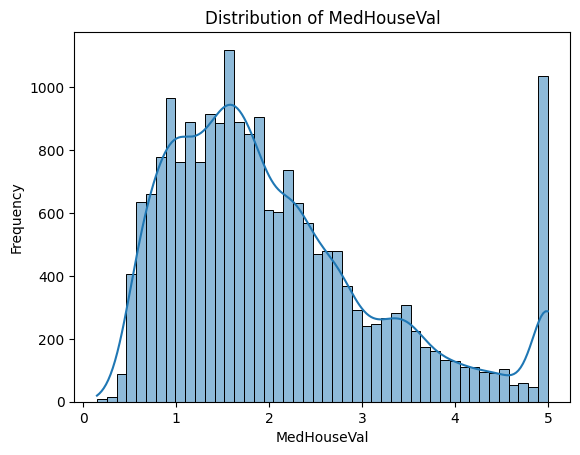

In [5]:
sns.histplot(data["MedHouseVal"], kde=True)
plt.xlabel("MedHouseVal")
plt.ylabel("Frequency")
plt.title('Distribution of MedHouseVal')
plt.show()

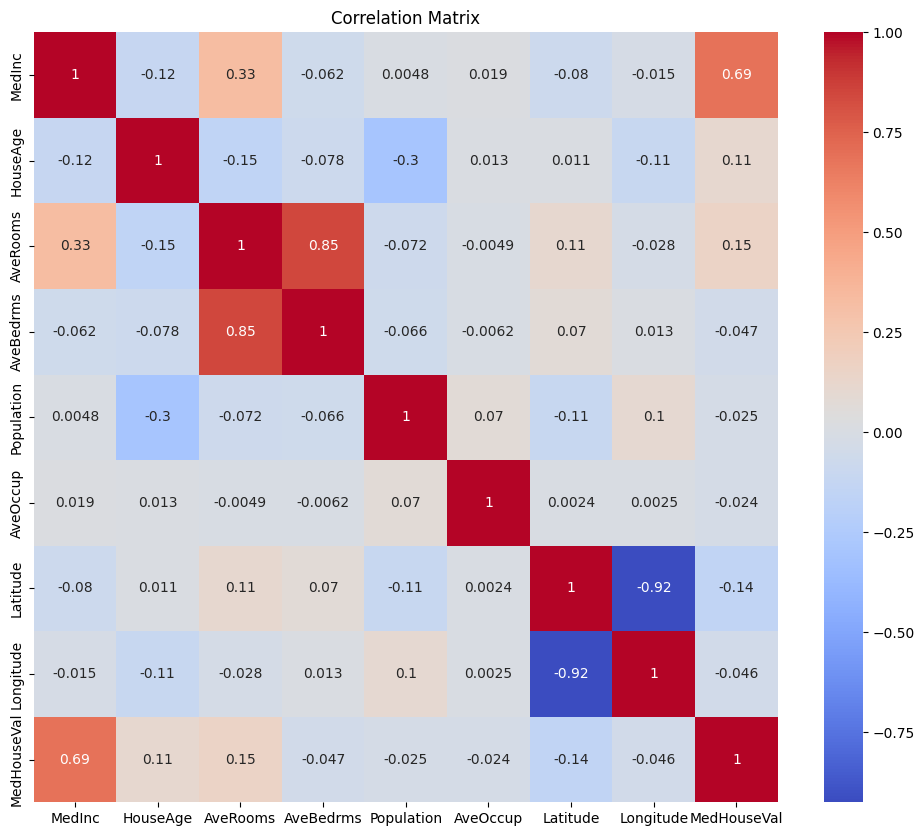

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

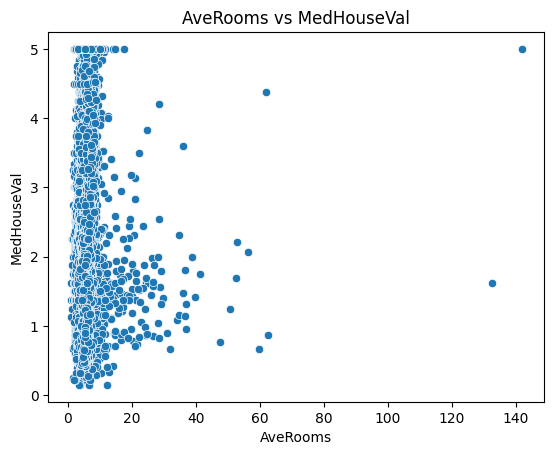

In [7]:
sns.scatterplot(data=data, x='AveRooms', y='MedHouseVal')
plt.title('AveRooms vs MedHouseVal')
plt.show()

Suggest there are some outliers for <code> AveRooms</code>

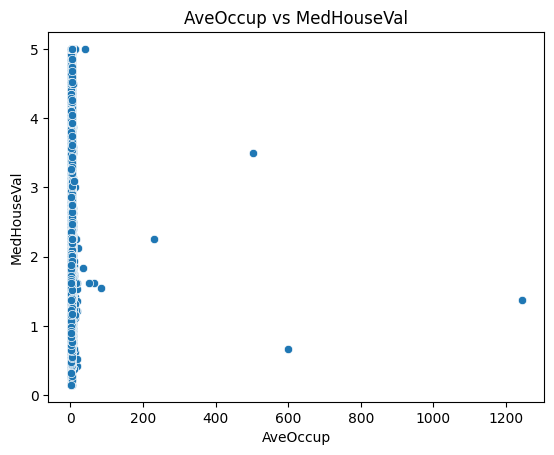

In [8]:
sns.scatterplot(data=data, x='AveOccup', y='MedHouseVal')
plt.title('AveOccup vs MedHouseVal')
# plt.xlim(0, 20)
plt.show()

few outliers for <code>AveOccup</code>

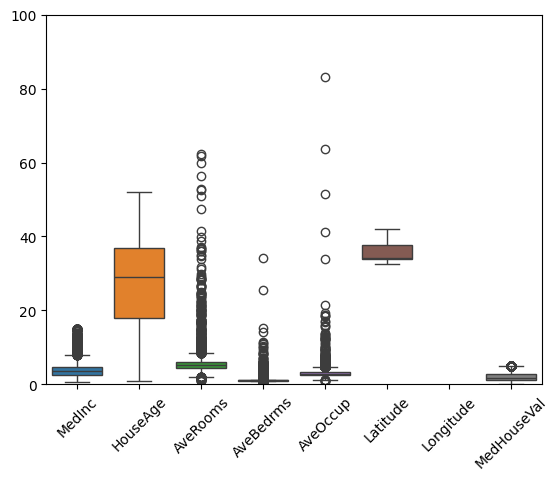

In [9]:
sns.boxplot(data.drop("Population", axis=1))
plt.xticks(rotation=45)
plt.ylim(0, 100)
!

Too many outliers for each feature


# Data Splitting and Model Building

In [10]:
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("Target shape of Test: ", y_test.shape)

X_train shape:  (16512, 8)
Target shape of Test:  (4128,)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model score on Training dataset: ", model.score(X_train, y_train))
print("Model score on Test dataset: ", model.score(X_test, y_test))

Model score on Training dataset:  0.6125511913966952
Model score on Test dataset:  0.5757877060324508


## Model Evaluation

In [12]:
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


In [13]:
print(f"Model Coefficient: {model.coef_}\n")
print("Model Intercept: ", model.intercept_)

Model Coefficient: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

Model Intercept:  -37.02327770606409


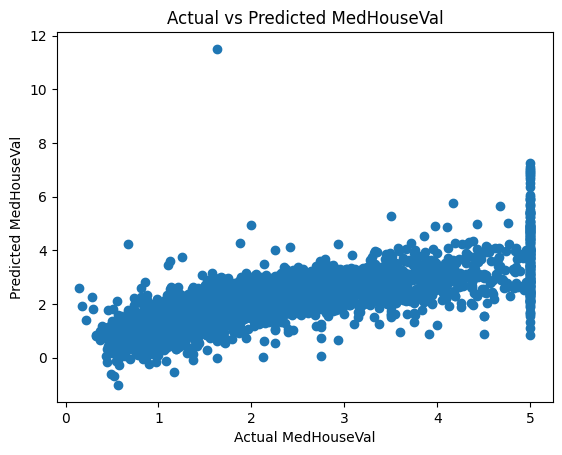

In [14]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted MedHouseVal')
plt.show()

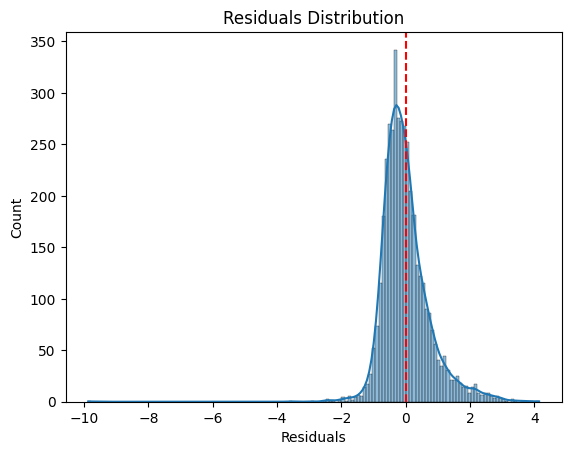

In [15]:
# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

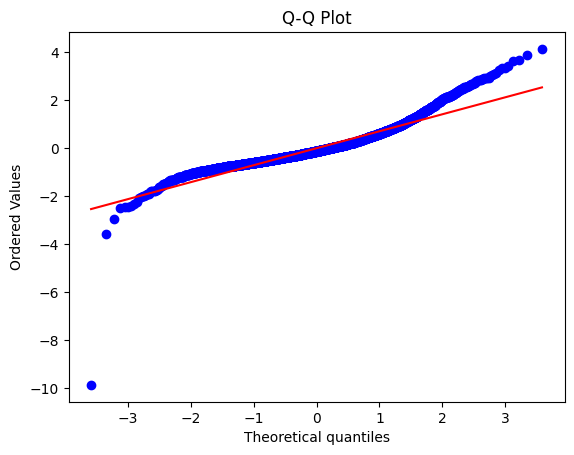

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Finding and filtering Outliers


In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_criteria = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Identify outliers
outliers = outlier_criteria.any(axis=1)

print("Shape : ", data[outliers].shape)
data[outliers].head()

Shape :  (4328, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600


In [18]:
new_data = data[~outliers]

print("Data with outliers: ", data.shape)
print("Data without outliers: ", new_data.shape)

Data with outliers:  (20640, 9)
Data without outliers:  (16312, 9)


In [19]:
X = new_data.drop("MedHouseVal", axis=1)
y = new_data["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model fitting with better data

In [20]:
model.fit(X_train, y_train)
print("Model score for training data: ", model.score(X_train, y_train))
print("Model score for test data", model.score(X_test, y_test))

Model score for training data:  0.6386295821560332
Model score for test data 0.6378964374821559


Far better performance after cleanin outliers

In [21]:
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.3165222770544477
R-squared: 0.6378964374821559


In [22]:
print(f"Model Coefficient: {model.coef_}\n")
print("Model Intercept: ", model.intercept_)

Model Coefficient: [ 4.51154313e-01  1.06846395e-02 -1.27330056e-01  1.27058890e+00
  7.92936185e-05 -3.68618583e-01 -3.93131911e-01 -3.93014583e-01]

Model Intercept:  -32.74859377576618


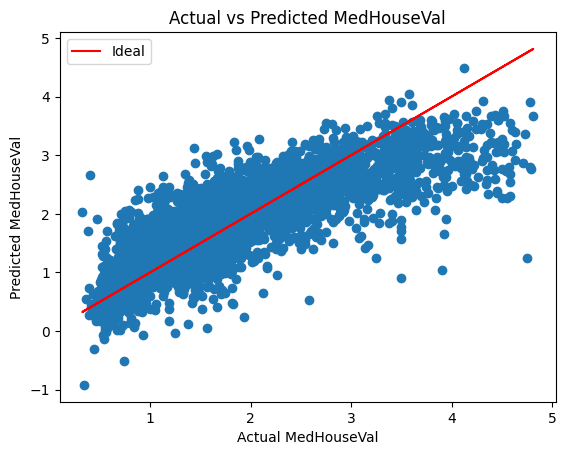

In [23]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test, color="red", label="Ideal")

plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted MedHouseVal')
plt.legend()

plt.show()

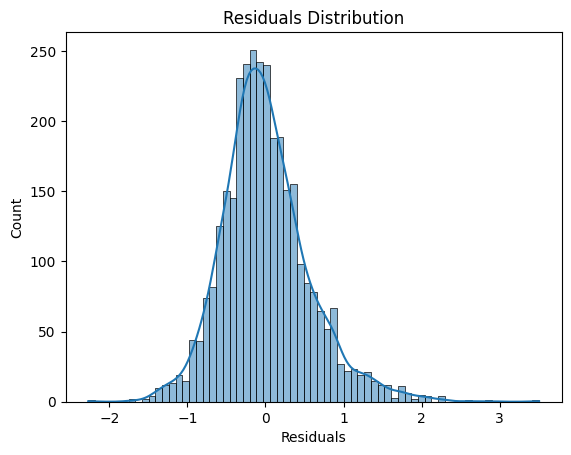

In [24]:
# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

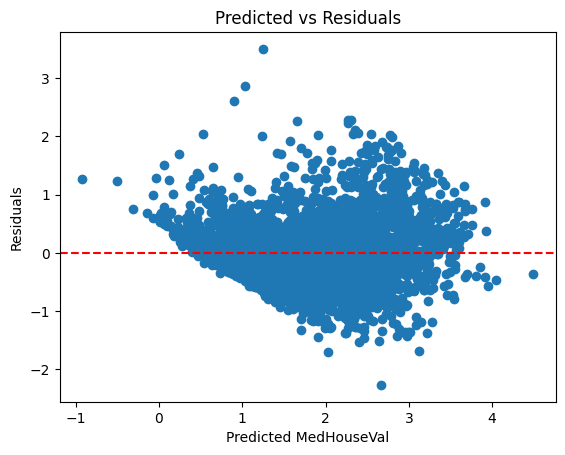

In [25]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

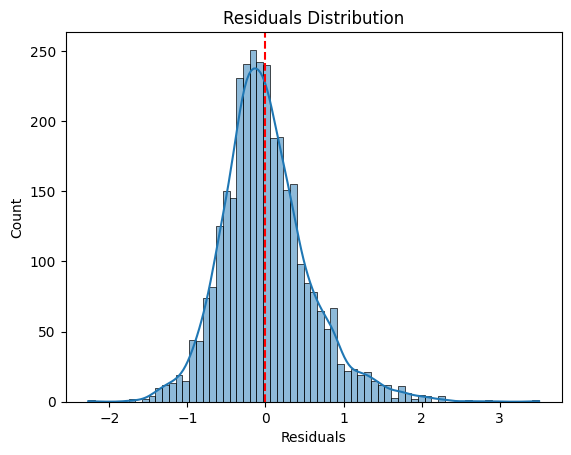

In [26]:

# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

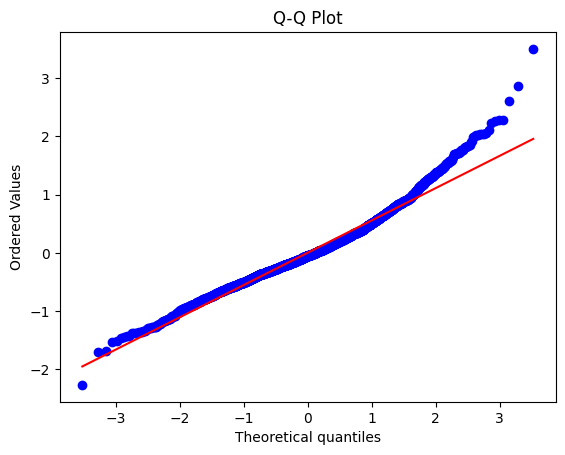

In [27]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()